              age        fare
count  714.000000  891.000000
mean    29.699118   32.204208
std     14.526497   49.693429
min      0.420000    0.000000
25%     20.125000    7.910400
50%     28.000000   14.454200
75%     38.000000   31.000000
max     80.000000  512.329200


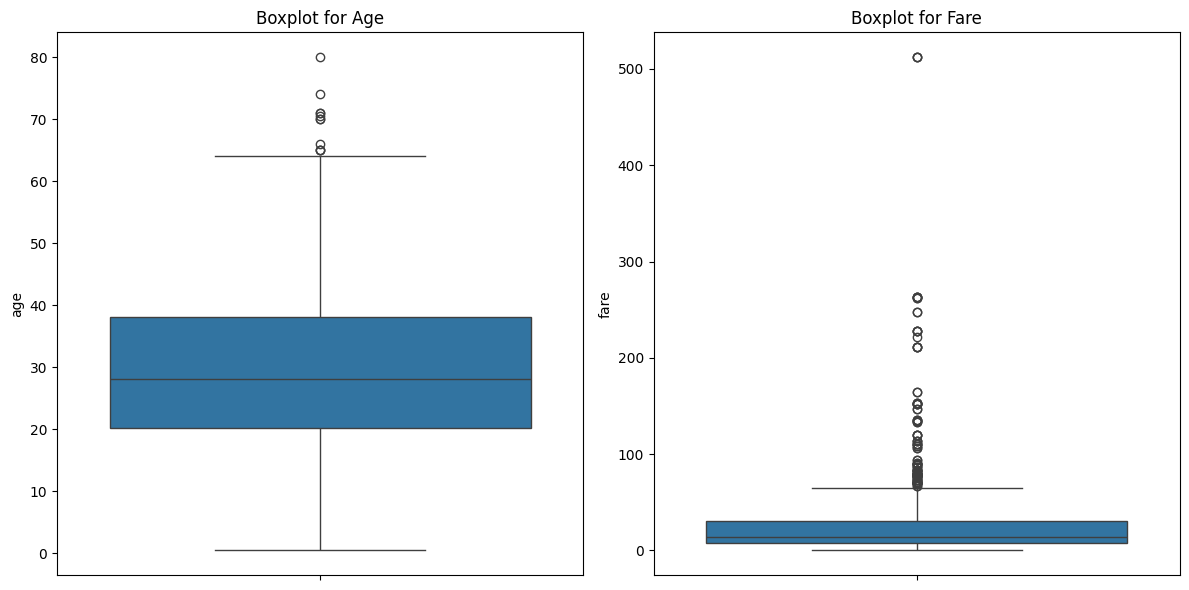

              age        fare
count  603.000000  765.000000
mean    28.269900   17.732232
std     13.468892   13.479643
min      0.420000    0.000000
25%     20.000000    7.895800
50%     28.000000   13.000000
75%     36.000000   26.000000
max     64.000000   65.000000


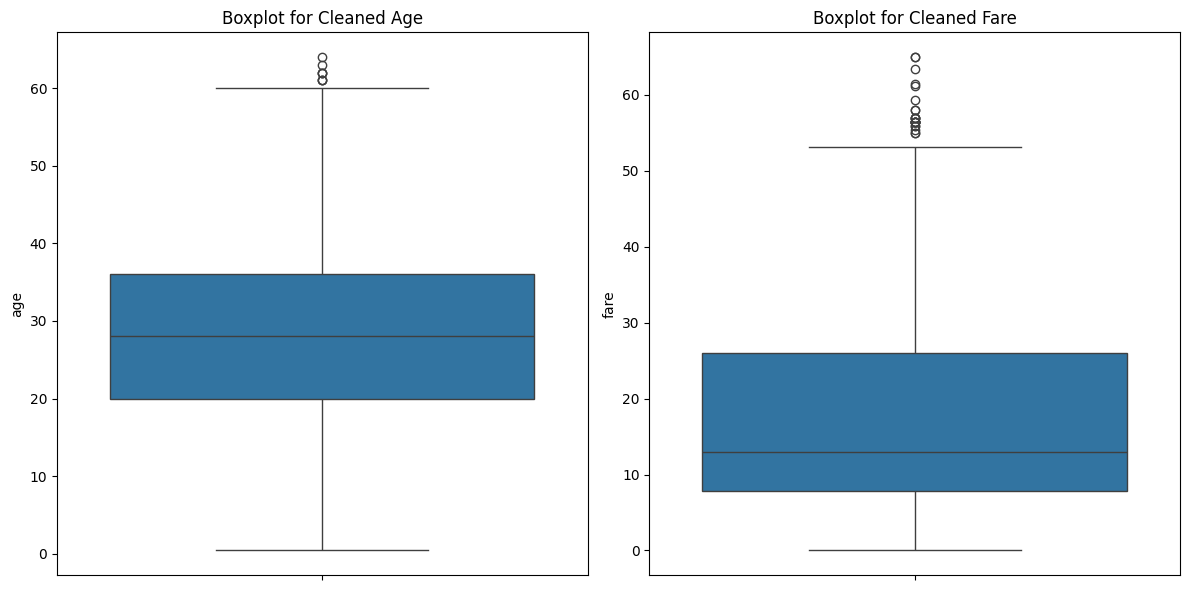

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

# Display basic statistics of numerical columns
print(titanic[['age', 'fare']].describe())

# Visualize boxplots for 'Age' and 'Fare' columns
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y='age', data=titanic)
plt.title('Boxplot for Age')

plt.subplot(1, 2, 2)
sns.boxplot(y='fare', data=titanic)
plt.title('Boxplot for Fare')

plt.tight_layout()
plt.show()

# Identify and remove outliers using the IQR method
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR

    outliers = (data[column] < lower_fence) | (data[column] > upper_fence)
    cleaned_data = data[~outliers]

    return cleaned_data

# Remove outliers in 'Age' and 'Fare' columns
titanic_cleaned = remove_outliers_iqr(titanic, 'age')
titanic_cleaned = remove_outliers_iqr(titanic_cleaned, 'fare')

# Display basic statistics of cleaned dataset
print(titanic_cleaned[['age', 'fare']].describe())

# Visualize boxplots for cleaned 'Age' and 'Fare' columns
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y='age', data=titanic_cleaned)
plt.title('Boxplot for Cleaned Age')

plt.subplot(1, 2, 2)
sns.boxplot(y='fare', data=titanic_cleaned)
plt.title('Boxplot for Cleaned Fare')

plt.tight_layout()
plt.show()
